In [1]:
!git clone https://github.com/LucaBassanese/Tesi

Cloning into 'Tesi'...
remote: Enumerating objects: 47, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (37/37), done.
remote: Total 176 (delta 19), reused 27 (delta 10), pack-reused 129
Receiving objects: 100% (176/176), 304.41 MiB | 11.33 MiB/s, done.
Resolving deltas: 100% (49/49), done.
Checking out files: 100% (80/80), done.


In [2]:
!pip install langid

     |████████████████████████████████| 1.9MB 2.5MB/s 
  Created wheel for langid: filename=langid-1.1.6-cp36-none-any.whl size=1941190 sha256=6d69f83522b0ec6b93b1ca2de10c42696b7fa851aedb990c3fae7c668648eabf
  Stored in directory: /root/.cache/pip/wheels/29/bc/61/50a93be85d1afe9436c3dc61f38da8ad7b637a38af4824e86e
Successfully built langid


In [3]:
import pandas as pd
import langid
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
df = pd.read_excel('/content/Tesi/data/abstract.xlsx')

In [0]:
df['autore'] = df['submitter: nome'] + ' ' +  df['submitter: cognome']

In [0]:
dft = df.copy()

# Titolo

In [0]:
dft = dft.drop_duplicates(['Titolo'])
# Seleziono sogli i titoli in inglese
lingua = [langid.classify(testo)[0] for testo in dft.Titolo]
lingua = pd.Series(lingua)
dft = dft[(lingua == 'en').values]

In [0]:
tokenizer = RegexpTokenizer(r'\w+')

In [0]:
words = [tokenizer.tokenize(fr.lower()) for fr in dft.Titolo ] 

In [0]:
frasi = [' '.join(word) for word in words]

In [0]:
lunghezza = [len(ab.split(' ')) for ab in frasi]

In [0]:
#creo lessico di tutte le parole
lessico = tokenizer.tokenize(' '.join(frasi ))


In [13]:
# grandezza lessico utilizzato
len(set(lessico))

3247

In [14]:
# numero di parole utilizzate
len(lessico)

16542

In [0]:
distr = (pd.Series(lessico)).value_counts()

In [16]:
sum(distr < 10 )

2954

In [17]:
2954 / 3247

0.9097628580227902

In [18]:
2606 / 3247

0.8025870033877426

# Abstract

In [0]:
df = df[df['Abstract inglese'].notnull()]
df = df.drop_duplicates(['Abstract inglese'])

In [0]:
words = [tokenizer.tokenize(fr.lower()) for fr in df['Abstract inglese'] ] 
frasi = [' '.join(word) for word in words]
lessico_abs = tokenizer.tokenize(' '.join(frasi ))


In [0]:
lunghezza_abs = [len(ab.split(' ')) for ab in frasi]

In [0]:
a = pd.Series(lunghezza).describe()

In [0]:
b = pd.Series(lunghezza_abs).describe()

In [0]:
a = pd.DataFrame(a)

In [0]:
tabella = pd.concat([a, b], axis= 1)

In [0]:
tabella.columns = ['Titoli', 'Abstract' ]

In [0]:
tabella = tabella.T

In [0]:
tabella['Numero di parole totali'] = [16542, 135518]

In [0]:
tabella['Vocabolario'] = [3247, 9758 ]

In [32]:
tabella

,count,mean,std,min,25%,50%,75%,max,Numero di parole totali,Vocabolario
Titoli,1548.0,10.686047,4.099397,1.0,8.0,10.0,13.0,28.0,16542,3247
Abstract,916.0,147.945415,75.596754,26.0,101.0,132.0,179.0,681.0,135518,9758


In [31]:
tabella.to_latex()

'\\begin{tabular}{lrrrrrrrrrr}\n\\toprule\n{} &   count &        mean &        std &   min &    25\\% &    50\\% &    75\\% &    max &  Numero di parole totali &  Vocabolario \\\\\n\\midrule\nTitoli   &  1548.0 &   10.686047 &   4.099397 &   1.0 &    8.0 &   10.0 &   13.0 &   28.0 &                    16542 &         3247 \\\\\nAbstract &   916.0 &  147.945415 &  75.596754 &  26.0 &  101.0 &  132.0 &  179.0 &  681.0 &                   135518 &         9758 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [0]:
#['Numerosità campione', 'Parole medie utilizzate', 'Std dell numero di parole medie', 'Numero minimo di parole', 'Mediana']

In [0]:
len(lessico_abs)

135518

In [0]:
len(lessico)

In [0]:
len(set(lessico_abs))

9758

In [0]:
singole_abs = len(set(lessico_abs))

In [0]:
distr = (pd.Series(lessico_abs)).value_counts()

In [0]:
distr2 = pd.Series(list(distr))

In [0]:
prob = distr2.value_counts(normalize= True)

In [0]:
import matplotlib.pyplot as plt
 

[]

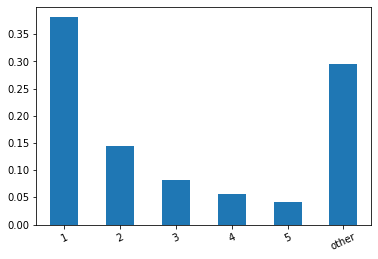

In [0]:
prob = distr2.value_counts(normalize= True)
threshold = 0.04
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob
prob.plot(kind='bar')
plt.xticks(rotation=25)
plt.plot()

In [0]:
prob = distr2.value_counts(normalize= True)
threshold = 0.04
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['> 5'] = tail_prob

In [0]:
prob.to_csv('Paroleabs.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [0]:
distr = (pd.Series(lessico)).value_counts()
distr2 = pd.Series(list(distr))

[]

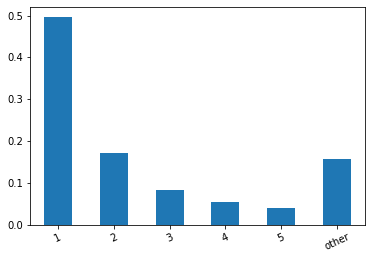

In [0]:
prob = distr2.value_counts(normalize= True)
threshold = 0.04
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['other'] = tail_prob
prob.plot(kind='bar')
plt.xticks(rotation=25)
plt.plot()

In [0]:
prob = distr2.value_counts(normalize= True)
threshold = 0.04
mask = prob > threshold
tail_prob = prob.loc[~mask].sum()
prob = prob.loc[mask]
prob['> 5'] = tail_prob

In [0]:
prob.to_csv('Paroletitolo.csv')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  """Entry point for launching an IPython kernel.


In [0]:
prob

1      0.495534
2      0.170619
3      0.083462
4      0.052972
5      0.040345
> 5    0.157068
dtype: float64

In [0]:
from google.colab import files
files.download("grafico.png")